In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Length of index is 366


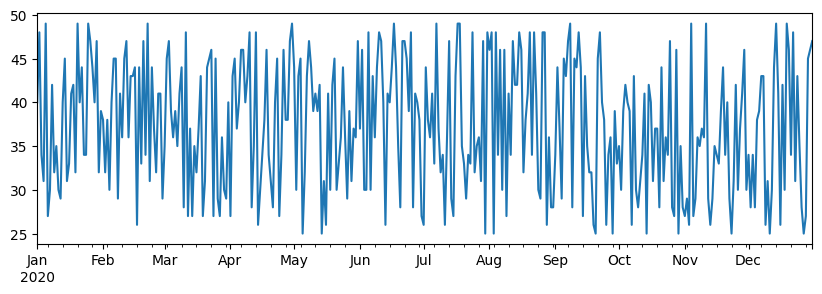

In [3]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
# print(idx)
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [4]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


2020-01-01    40.0
2020-01-02    48.0
2020-01-03    34.0
2020-01-04    31.0
2020-01-05    59.0
              ... 
2020-12-27    35.0
2020-12-28    27.0
2020-12-29    45.0
2020-12-30    46.0
2020-12-31    47.0
Length: 366, dtype: float64


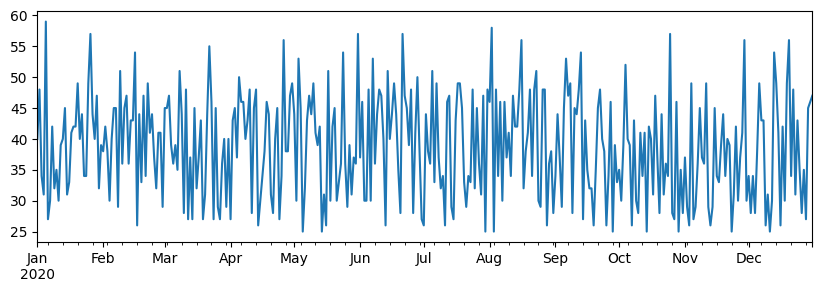

In [5]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16916\628527300.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = total_items.resample("1M").mean()


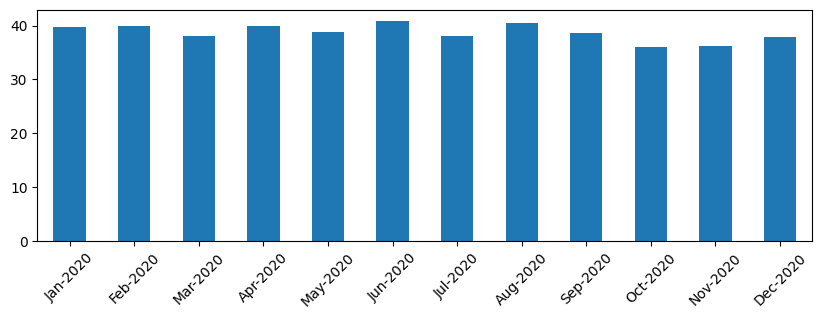

In [6]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

In [7]:
df = pd.DataFrame([a,b])
df

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6,7,8,9
1,I,like,to,use,Python,and,Pandas,very,much


In [8]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


In [9]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


In [10]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


In [11]:
df[df['A']<5]

,A,B
0,1,I
1,2,like
2,3,to
3,4,use


In [12]:
df[(df['A']>5) & (df['A']<7)]

,A,B
5,6,and


In [13]:
df['DivA'] = df['A']-df['A'].mean()
df

,A,B,DivA
0,1,I,-4.0
1,2,like,-3.0
2,3,to,-2.0
3,4,use,-1.0
4,5,Python,0.0
5,6,and,1.0
6,7,Pandas,2.0
7,8,very,3.0
8,9,much,4.0


In [14]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result


In [15]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6
5,6,and,1.0,3
6,7,Pandas,2.0,6
7,8,very,3.0,4
8,9,much,4.0,4


In [16]:
df.iloc[:5]

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6


In [17]:
df.groupby(by='LenB').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [18]:
TypeError: Could not convert string 'I' to numeric

SyntaxError: invalid syntax (306081711.py, line 1)

In [19]:
df.groupby('LenB').mean(numeric_only=True)

,A,DivA
LenB,,
1,1.000000,-4.000000
2,3.000000,-2.000000
3,5.000000,0.000000
4,6.333333,1.333333
6,6.000000,1.000000


In [20]:
print(df.dtypes)

A         int64
B        object
DivA    float64
LenB      int64
dtype: object


In [21]:
df.groupby('LenB')[['ColumnaNumerica1', 'ColumnaNumerica2']].mean()

KeyError: "Columns not found: 'ColumnaNumerica2', 'ColumnaNumerica1'"

In [22]:
print(df.columns)

Index(['A', 'B', 'DivA', 'LenB'], dtype='object')


In [23]:
Index(['LenB', 'Edad', 'Nombre', 'Score'], dtype='object')

NameError: name 'Index' is not defined

In [24]:
print(df.columns)


Index(['A', 'B', 'DivA', 'LenB'], dtype='object')


In [25]:
df.groupby(by='LenB').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [26]:
df.dtypes

A         int64
B        object
DivA    float64
LenB      int64
dtype: object